In [1]:
%matplotlib inline

# Importing some tools for loading data and plotting
import matplotlib.pyplot as plt   # plotting tools
import numpy as np                # numpy for math on arrays
import pandas as pd    # pandas gives us DataFrames
import seaborn as sns  # seaborn helps us plot more easily

# This is the clustering algorithm we will try to understand - KMeans
from sklearn.neighbors import KNeighborsClassifier

# The metrics package helps us evaluate our clustering approach. 
from sklearn import metrics

In [2]:
# Step 1: load the data. It is formatted in "comma-separated values" format, or "csv"
wine_df = pd.read_csv('wine_data_clubes.csv')

# Step 2: let's take a look at the beginning of the data.
wine_df.head()

,class,alcohol,malic,ash,mg,hue,od_ratio,proline
0,1,14.23,1.71,2.43,127,1.04,3.92,1065
1,1,13.20,1.78,2.14,100,1.05,3.40,1050
2,1,13.16,2.36,2.67,101,1.03,3.17,1185
3,1,14.37,1.95,2.50,113,0.86,3.45,1480
4,1,13.24,2.59,2.87,118,1.04,2.93,735


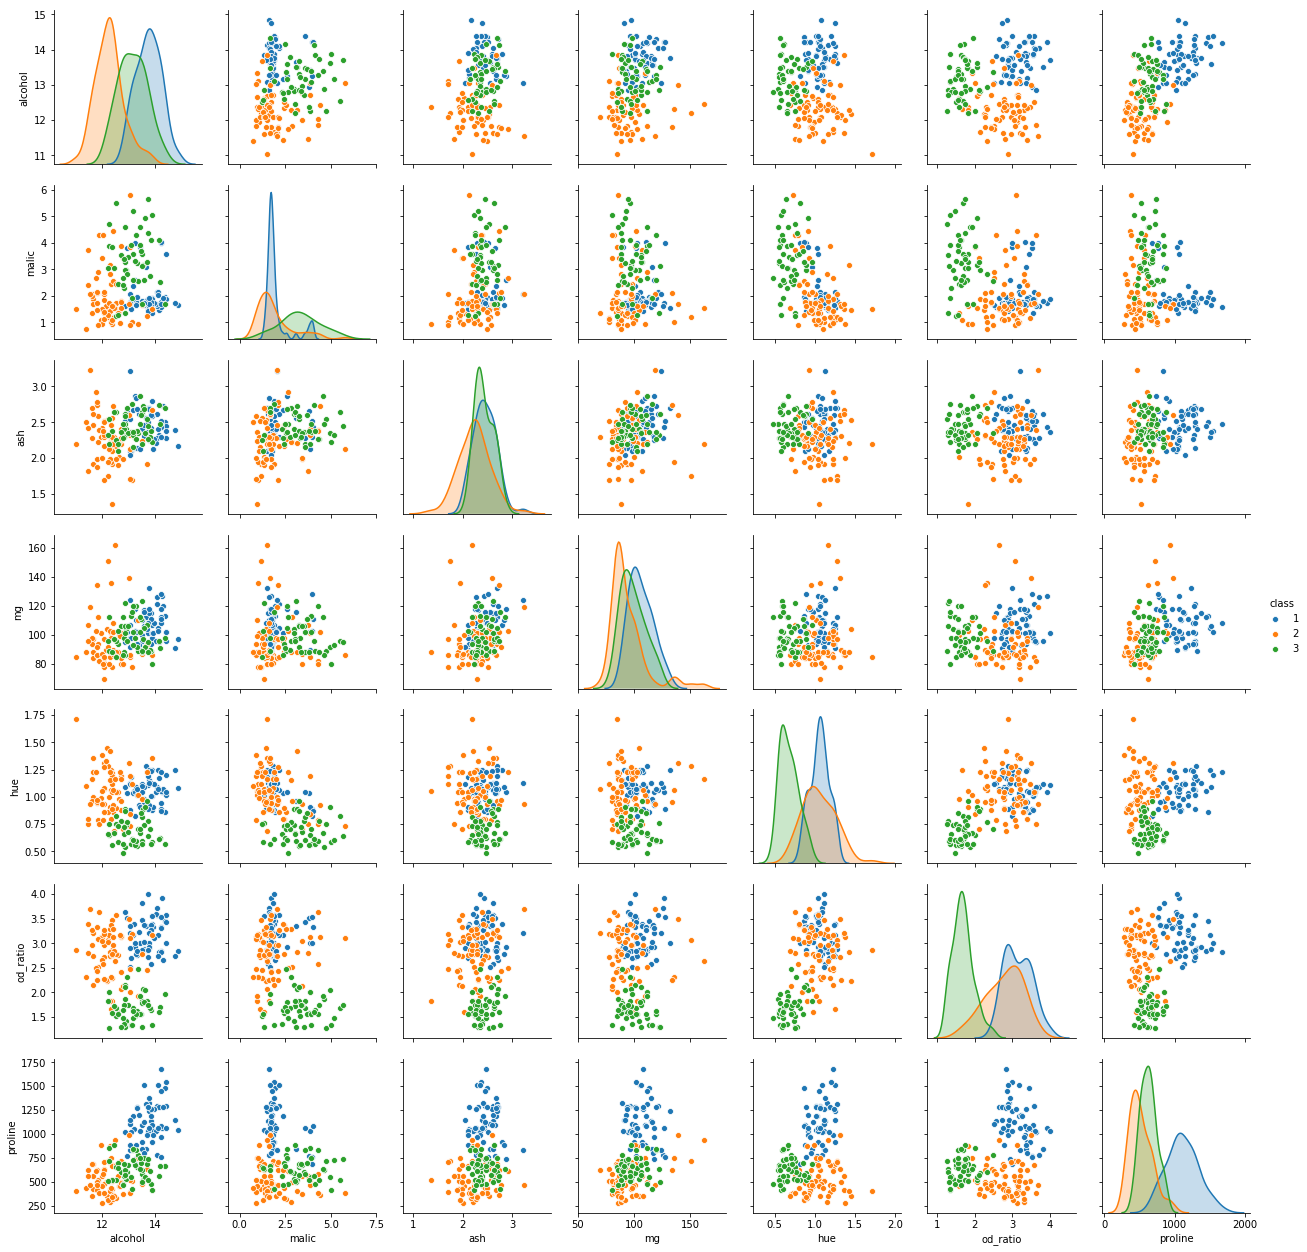

In [3]:
# Seaborn has a nice tool for looking at all pairs of data about the wine.
sns.pairplot(wine_df,       # looking at the wine data
             hue='class',   # color by 'class' column
             vars=wine_df.columns[1:])  # skip the class column, which is first, since it is the color

## Feature selection
Notice that the wines (different colors of points) are very well separated in the two-dimensional plot of 'od_ratio' against 'alcohol'.

* 'od_ratio' has someting to do with the color and darkness of the wine
* 'alcohol' is the alcohol content of the wine in % 

This is a simple version of "feature selection" - we select "features" of the wines that do a good job
telling them apart in two dimensions. We did this by eye, but you can imagine writing an algorithm that does this. Spend a minute thinking about how you would do this.

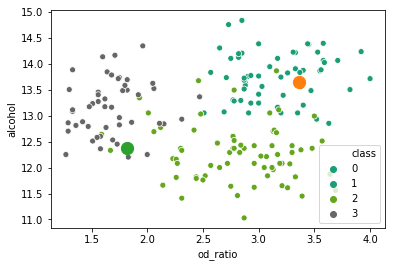

In [4]:
# Now let's take a look at a 2D plot of these data. 
sns.scatterplot(data=wine_df, x='od_ratio', y='alcohol', # scatter of alcohol vs od_ratio
                hue='class',      # color by which wine it is.
                palette='Dark2')  # use darker colors to make it easier to see. 
plt.scatter(wine_df.iloc[19].od_ratio, wine_df.iloc[19].alcohol, s=150)
plt.scatter(wine_df.iloc[59].od_ratio, wine_df.iloc[59].alcohol, s=150)

plt.show()

# Predicting Labels
What category should we guess for the orange point? What about the big green one? 

Our goal here is to guess which kind of wine we are talking about based on these two properties alone. How would you go about this? Imagine you want to program a computer to win a wine-tasting competition. 

One strategy is to ask "which wines are like this one". The K-nearest neighbors algorithm does this by asking what categories the K closest points belong to. K is just a number, like 5.

In [5]:
# We will try KNN on our wine data. 
# Setup - we only need 'class', 'od_ratio' and 'alcohol' variables
cols = ['class', 'od_ratio', 'alcohol']
whole_dataset = wine_df[cols].copy()

# We ask the algorithm to "fit" the data that we have, i.e. learn from it. 
# Reminder: this is "supervised learning" so the training algorithm knows the right answer.
train_cols = ['od_ratio', 'alcohol']
target_col = 'class'

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(whole_dataset[train_cols], whole_dataset[target_col])
predictions = knn.predict(whole_dataset[train_cols])

# Save the results
results = whole_dataset.copy()
results['predicted_class'] = predictions
results[results.predicted_class != results['class']]

,class,od_ratio,alcohol,predicted_class
59,2,1.82,12.37,3
60,2,1.67,12.33,3
61,2,1.59,12.64,3
62,2,2.46,13.67,1
66,2,3.18,13.11,1
68,2,1.93,13.34,3
70,2,1.82,12.29,3
71,2,3.16,13.86,1
72,2,2.78,13.49,1
73,2,3.50,12.99,1


## Evaluating our results
We can evaluate predictions based on how well they match the true classes. What we'd like to know is this: what fraction of the wines are assigned to the "right" cluster?

In [6]:
# metrics.accuracy() asks: what fraction of wines were given the correct label. 
accuracy_pct = 100*metrics.accuracy_score(results['class'], results['predicted_class'])
print('clustering accuracy: %.2f%%' % accuracy_pct)

clustering accuracy: 89.33%


## Exercises:
* Can you implement accuracy() yourself? 

## Using clusters for prediction
If we really want a computer to win a wine-tasting contest, we need to be able to predict the classes of new wines haven't tasted before. Above we calculated the accuracy of our clusters for wines we already saw, but we didn't predict anything! All the wines we tested ourselves on were also used to make the clustering. 

Question: how would you go about evaluating the quality of your clustering as a means of prediction? 

Let's try do test prediction by "leaving out" some data. This is called a "train-test split" where we use some of the data to "learn" or "train" and the rest of the data to test the quality of our learning. 

In [7]:
# Setup - we will make a train and test set.
# using od_ratio and alcohol variables
cols = ['class', 'od_ratio', 'alcohol']
whole_dataset = wine_df[cols].copy()

# We will grab 17 wines evenly spaced through the dataset for the test set.
# We do this because the data is in a particular order, so grabbing from the end will give us all one type of wine. 
subset = np.arange(0, 178, 10)
test_set = whole_dataset.iloc[subset].copy()

# The remaining wines (after dropping those ten) are
train_set = whole_dataset.drop(subset, axis=0)

# Reminder: this is "supervised learning" so the training algorithm
# knows the right answer. 
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train_set[train_cols], train_set[target_col])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [8]:
# Now we ask KNN to predict classes that same data
pred = knn.predict(test_set[train_cols])

# Save the prediction with the test set
test_set['predicted_class'] = pred

# Let's take a look
test_set

,class,od_ratio,alcohol,predicted_class
0,1,3.92,14.23,1
10,1,3.17,14.10,1
20,1,3.71,14.06,1
30,1,2.71,13.73,1
40,1,3.38,13.56,1
50,1,2.91,13.05,1
60,2,1.67,12.33,3
70,2,1.82,12.29,3
80,2,3.12,12.00,2
90,2,2.27,12.08,2


In [9]:
# metrics.accuracy() asks: what fraction of wines were given the correct label. 
accuracy_pct = 100*metrics.accuracy_score(test_set['class'], test_set['predicted_class'])
print('clustering accuracy: %.2f%%' % accuracy_pct)

clustering accuracy: 83.33%


## Lower accuracy?!
Before we have 89%, but now that we split the "train" and "test" sets from each other the accuracy is lower. This is to be expected! Before, we were making "predictions" when we already knew the answer. Now we are making predictions for points where we didn't already know. Would be surprising if the results got better...

## Excercises
Do you think that you can improve accuracy? 
Some suggestions for how to do this
* Use more than two columns to train the KNN model.
* Use different parameters to KNN, for example more neighbors or a different "distance metric"

You can read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to learn more about KNeighborsClassifier.
